#Используя механизм получения данных с рынков, описанный в документации, была применена модель “Плавающего окна” для прогноза акций компании с использованием механизма stooq.








In [2]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Загрузка данных индекса Dow Jones с сайта Stooq

In [3]:
data = web.DataReader('^DJI', 'stooq')
data = data.sort_index()  # Сортировка данных по дате

Выделяем столбец 'Close' для анализа


In [4]:
close_prices = data['Close']

Разделение данных на обучающую и тестовую выборки:

In [5]:
window_size = 30 # Определение размера окна

# Создание обучающих и тестовых выборок
X = []
y = []

for i in range(len(close_prices) - window_size):
    X.append(close_prices[i:i + window_size])
    y.append(close_prices[i + window_size])

X = np.array(X)
y = np.array(y)

Построение модели

In [6]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Оценка модели

In [7]:
# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Оценка точности модели
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 56296.94718702407


Визуализация

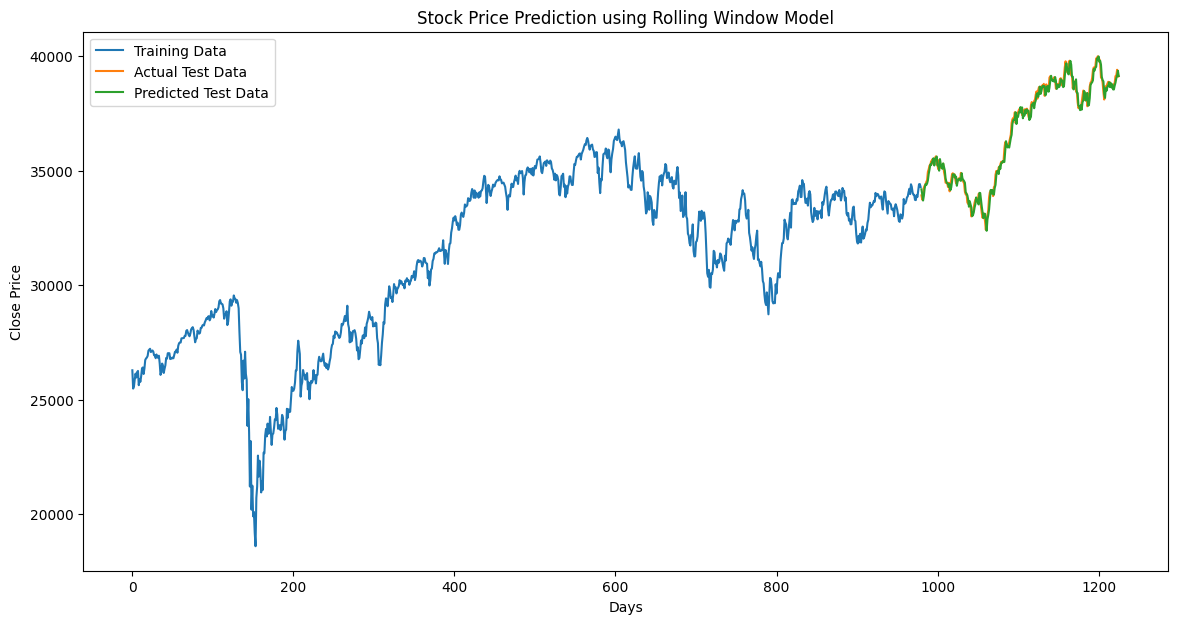

In [8]:
plt.figure(figsize=(14, 7))

# Отображение реальных и предсказанных значений на тестовой выборке
plt.plot(range(len(y_train)), y_train, label='Training Data')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual Test Data')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_pred, label='Predicted Test Data')

plt.xlabel('Days')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction using Rolling Window Model')
plt.legend()
plt.show()